# Section: Ensemble Techniques

## <font color='#4073FF'>Project Solution: Bank Churn Prediction</font>

###  <font color='#14AAF5'>Predict customer churn for a bank using ensemble techniques.</font>

### Project Brief:

Customer churn is an important metric to track because lost customers equal lost revenue. If a company loses enough customers, it can have a serious impact. Customer churn is important because it’s more expensive to acquire a new customer than to sell more to an existing client. In fact, this is one metric that can make or break a business: If you do a better job keeping customers around, you should see your average customer lifetime value increase, making every future sale even more valuable and ultimately improving your unit margins.

### 1. Dataset 

The dataset consists of 14 columns as follows:

1. 'RowNumber' - Record No.
2. 'CustomerId' - Unique ID of Customer.
3. 'Surname' - Last name of user.
4. 'CreditScore' -It is the numerical representation of a customer's creditworthiness. Credit score ranges vary based on   the credit scoring model used, but are generally similar to the following:

        - 300-579: Poor
        - 580-669: Fair
        - 670-739: Good
        - 740-799: Very good
        - 800-850: Excellent
5. 'Geography' - Geography to where customer belongs.
6. 'Gender'- Gender of the customer. 
7. 'Age' - Age of customer.
8. 'Tenure' - Number of years the client was affiliated with the bank.
9. 'Balance' - Amount in a particular cuatomer's account.
10. 'NumOfProducts'- Number of products brought.
11. 'HasCrCard' - Does the customer have credit card?
12. 'IsActiveMember' - Is the customer an active member?
13. 'EstimatedSalary' - Estimated salary of customer.
14. 'Exited' - Did a customer exited? or stayed?

### 2. Data Collection and Data Exploration

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
sns.set(style="whitegrid")

In [2]:
#Load data
df = pd.read_csv("Bank_churn_modelling.csv")

In [3]:
# Viewing the Dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Looking at Unique Values
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
# Descriptive Statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### atleast 25% of the customers have balance=0 in their account

### 3. Data Cleaning

In [8]:
# check for duplicate entries
df.duplicated().sum()

0

In [9]:
# check for unwanted columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# dropping unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 4. Data Visualization

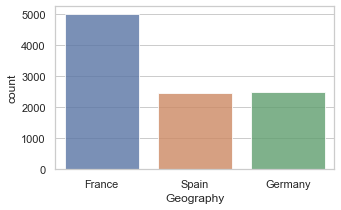

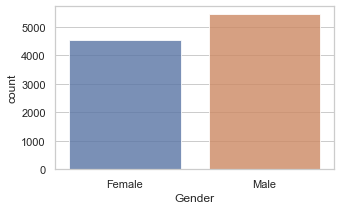

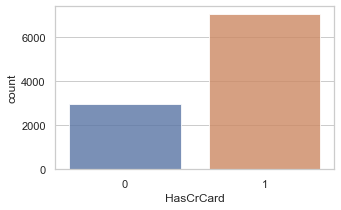

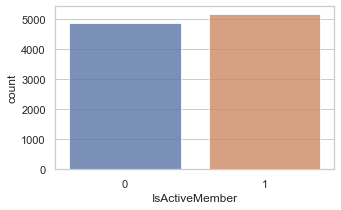

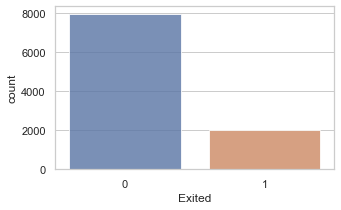

In [12]:
# Visualizing Categorical Data
cats = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember', 'Exited']
for column in cats:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[column],alpha=0.8)
   
plt.show()

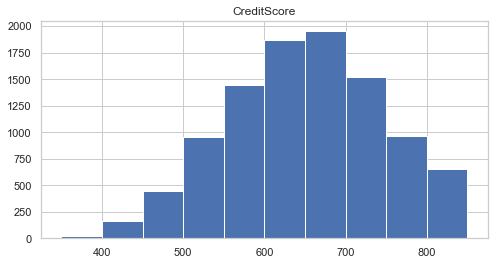

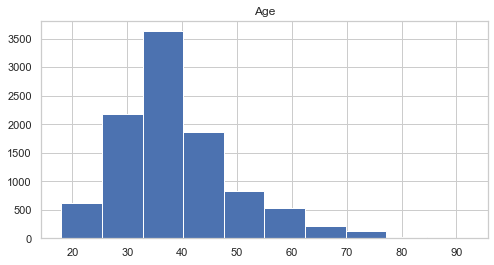

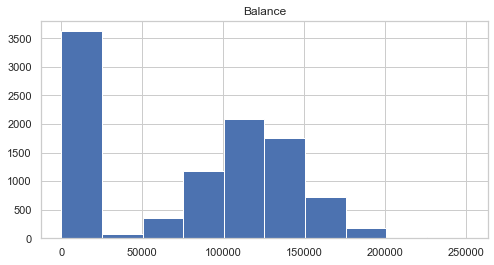

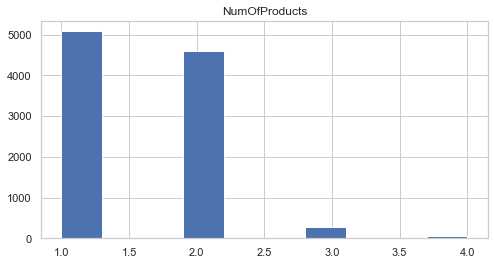

In [13]:
# Visualizing Numeric data
nums = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']
for column in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

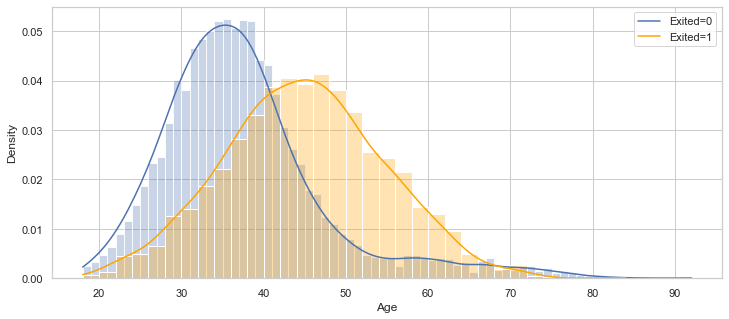

In [14]:
# Age v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['Age'][df.Exited==0],color='b',kde=True,stat="density",alpha=0.3)
sns.histplot(df['Age'][df.Exited==1],kde=True,color='orange',stat="density",alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

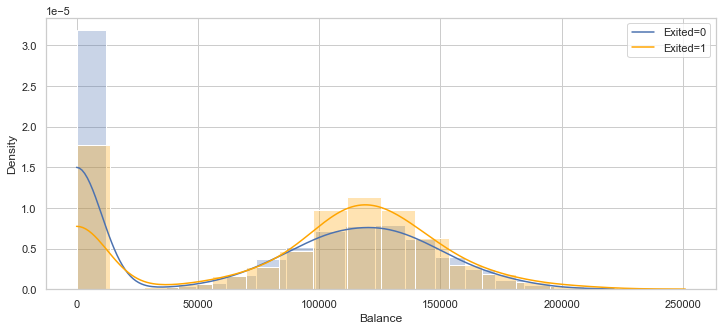

In [15]:
# Balance v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['Balance'][df.Exited==0],color='b',kde=True,stat="density",alpha=0.3)
sns.histplot(df['Balance'][df.Exited==1],color='orange',kde=True,stat="density",alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

#### important features = Age, Balance

### 5. Correlation Analysis

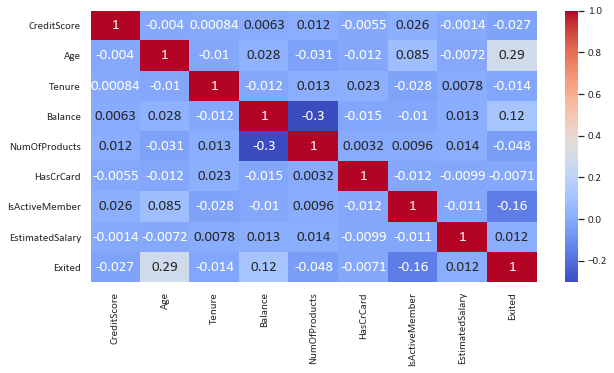

In [16]:
import matplotlib

# Finding correlation between variables
cor = df.corr()
font = {"size":15,'family':'calibri'}

matplotlib.rc('font',**font)
plt.figure(figsize=(10,5))

# Plotting the correlation matrix
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

### 6. ANOVA

ANOVA - Analysis of Variance
- if pvalue < alpha = reject the Null Hypothesis = feature is important
- if pvalue > alpha = accept the Null Hypothesis = feature is not important

Considering CI = 95%

               alpha = 1 - CI = 1 - 0.95 = 0.05

In [17]:
from sklearn.feature_selection import f_classif

nums = ['CreditScore','Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
xd = df[nums]
yd = df['Exited']


fscore,pvalue = f_classif(xd,yd)

for i in range(len(nums)):
    print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


**Important features - CreditScore, Age, Balance, Numofproducts**

### 7. Chi Square Test

Chi Square test
- if pvalue < alpha = reject the Null Hypothesis = feature is important
- if pvalue > alpha = accept the Null Hypothesis = feature is not important

Considering CI = 95%

               alpha = 1 - CI = 1 - 0.95 = 0.05

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
       
xd = df[cats]
y = df['Exited']

xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])


cscore,pvalue = chi2(xd,yd)

for i in range(len(cats)):
    print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


In [19]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df['Exited']

### 8. Preprocessing

In [20]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [21]:
# encoding
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler

pipeline = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2])],remainder='passthrough')
pipeline.fit(x)
x2 = pipeline.transform(x)
x2.shape

(10000, 8)

### 9. Predictive Modelling - Bank Churn Prediction

#### **Methodology – Ensemble Techniques** 

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would.

It seeks for better predictive performance by combining the predictions from multiple models.

#### Train test split

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=5,stratify=y)
print(x2.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 8)
(8000, 8)
(2000, 8)
(10000,)
(8000,)
(2000,)


#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,random_state=5,max_depth=8,min_samples_leaf=10,
                              oob_score=True)

# train the model with train data - X_train and y_train
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=200,
                       oob_score=True, random_state=5)

In [24]:
from sklearn import metrics

# performance analysis on test data
ypred = model.predict(X_test)
print("Accuracy ",metrics.accuracy_score(y_test,ypred))
print("Recall ",metrics.recall_score(y_test,ypred))
print("F1 score ",metrics.f1_score(y_test,ypred))

Accuracy  0.862
Recall  0.4201474201474201
F1 score  0.553398058252427


#### Ada Boost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
model2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=5,max_depth=3),
                           n_estimators=120,random_state=5)

In [27]:
# train the model
model2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=5),
                   n_estimators=120, random_state=5)

In [28]:
# performance analysis on test data
ypred = model2.predict(X_test)
print("Accuracy ",metrics.accuracy_score(y_test,ypred))
print("Recall ",metrics.recall_score(y_test,ypred))
print("F1 score ",metrics.f1_score(y_test,ypred))

Accuracy  0.8355
Recall  0.457002457002457
F1 score  0.5306704707560629


#### Gradient Boosting Algorithm

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=150,learning_rate=0.05,max_depth=5)

#train the model on train data
model3.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=150)

In [30]:
# performance analysis on test data
ypred = model3.predict(X_test)
print("Accuracy ",metrics.accuracy_score(y_test,ypred))
print("Recall ",metrics.recall_score(y_test,ypred))
print("F1 score ",metrics.f1_score(y_test,ypred))

Accuracy  0.863
Recall  0.4742014742014742
F1 score  0.5848484848484848


#### XGBoost

In [31]:
!pip install xgboost

In [40]:
from xgboost import XGBClassifier
model4 = XGBClassifier(n_estimators=120,learning_rate=0.15,max_depth=5)
# train the model
model4.fit(X_train,y_train)

C:\Users\shrut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
# performance analysis on test data
ypred = model4.predict(X_test)
print("Accuracy ",metrics.accuracy_score(y_test,ypred))
print("Recall ",metrics.recall_score(y_test,ypred))
print("F1 score ",metrics.f1_score(y_test,ypred))

Accuracy  0.8695
Recall  0.4963144963144963
F1 score  0.6075187969924812


#### Stacking

In [34]:
!pip install mlxtend

In [35]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [36]:
base1 = DecisionTreeClassifier(max_depth=12,random_state=5,min_samples_leaf=10)
base2 = KNeighborsClassifier(n_neighbors=3)
base3 = RandomForestClassifier(n_estimators=300,random_state=5,max_depth=7)
base4 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=5,max_depth=5),n_estimators=200,
                           random_state=5)

meta = LogisticRegression()

In [37]:
model5 = StackingClassifier(classifiers=[base1,base2,base3,base4],meta_classifier=meta)

In [38]:
model5.fit(X_train,y_train)

StackingClassifier(classifiers=[DecisionTreeClassifier(max_depth=12,
                                                       min_samples_leaf=10,
                                                       random_state=5),
                                KNeighborsClassifier(n_neighbors=3),
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=300,
                                                       random_state=5),
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                         random_state=5),
                                                   n_estimators=200,
                                                   random_state=5)],
                   meta_classifier=LogisticRegression())

In [39]:
# performance analysis on test data
ypred = model5.predict(X_test)
print("Accuracy ",metrics.accuracy_score(y_test,ypred))
print("Recall ",metrics.recall_score(y_test,ypred))
print("F1 score ",metrics.f1_score(y_test,ypred))

Accuracy  0.821
Recall  0.4914004914004914
F1 score  0.5277044854881267
